In [1]:
import os
import imageio
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

from keras import backend as K
from keras.models import load_model

from yolo_utils import read_classes, read_anchors, generate_colors, preprocess_image, draw_boxes
from yad2k.models.keras_yolo import yolo_head, yolo_eval

Using TensorFlow backend.


In [2]:
class_names = read_classes("model_data/coco_classes.txt")
anchors = read_anchors("model_data/yolo_anchors.txt")
yolo_model = load_model("model_data/yolo.h5")
# yolo_model.summary()

/home/fountainhead_gq/anaconda3/envs/tensorflow_p35/lib/python3.5/site-packages/keras/models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
input_image_name = "test1.jpg"
input_image = Image.open("images/" + input_image_name)

width, height = input_image.size
width = np.array(width, dtype=float)
height = np.array(height, dtype=float)
image_shape = (height, width)
print(image_shape)

(array(720.0), array(1280.0))


In [4]:
#Convert final layer features to bounding box parameters
yolo_outputs = yolo_head(yolo_model.output, anchors, len(class_names))

#Now yolo_eval function selects the best boxes using filtering and non-max suppression techniques.
boxes, scores, classes = yolo_eval(yolo_outputs, image_shape)


In [5]:
# Initiate a session
sess = K.get_session()

#Preprocess the input image before feeding into the convolutional network
image, image_data = preprocess_image("images/" + input_image_name, model_image_size = (608, 608))

#Run the session
out_scores, out_boxes, out_classes = sess.run([scores, boxes, classes],feed_dict={yolo_model.input:image_data,K.learning_phase(): 0})


In [ ]:
#Print the results
# print('Found {} boxes for {}'.format(len(out_boxes), input_image_name))

car 0.79 (1047, 405) (1259, 510)
car 0.80 (822, 413) (941, 488)


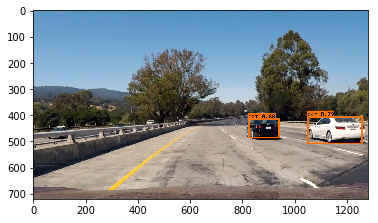

In [6]:
#Produce the colors for the bounding boxs
colors = generate_colors(class_names)
#Draw the bounding boxes
draw_boxes(image, out_scores, out_boxes, out_classes, class_names, colors)
#Apply the predicted bounding boxes to the image and save it
image.save(os.path.join("out", input_image_name), quality=90)
output_image = imageio.imread(os.path.join("out", input_image_name))
imshow(output_image)